<a href="https://colab.research.google.com/github/syriness/MiniProject_AirlineMachineLearning/blob/main/Airline(Kao)_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 - 항공사 고객 만족도 예측

## 데이터 불러오기 및 확인과 인코딩

### 라이브러리 임포트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기 및 확인

In [ ]:
airline = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/train.csv")

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
airline

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# null값 확인 후 제거
airline.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
# 데이터 수에 비해 null값이 작기 때문에 그냥 제거함
airline.dropna(inplace=True)

### 범주형 데이터 인코딩

In [ ]:
# Personal Data로 데이터프레임 구성 (개인 정보로 군집학습, 범주형 데이터를 구분하기 위해서)
airline_personal = airline[["satisfaction", "Gender", "Customer Type", 
                          "Age", "Type of Travel", "Class", "Flight Distance"]]

In [ ]:
# Personal Data 레이블 인코딩 (범주형 데이터를 연속형 변수로 바꿈)
from sklearn.preprocessing import LabelEncoder

temp_list = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
encoder = LabelEncoder()
for i in temp_list:
    encoder.fit(airline_personal[i])
    airline_personal[i] = encoder.transform(airline_personal[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 시험셋도 미리 불러오고 인코딩
airline2 = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/test.csv")

airline2.isnull().sum()
airline2.dropna(inplace=True)

airline_test = airline2["satisfaction"]
airline_test_X = airline2.iloc[:, 8:24]

encoder2 = LabelEncoder()
encoder2.fit(airline_test)
airline_test = encoder2.transform(airline_test)

airline_test_X.info()
airline_test_X.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Inflight wifi service              25893 non-null  int64  
 1   Departure/Arrival time convenient  25893 non-null  int64  
 2   Ease of Online booking             25893 non-null  int64  
 3   Gate location                      25893 non-null  int64  
 4   Food and drink                     25893 non-null  int64  
 5   Online boarding                    25893 non-null  int64  
 6   Seat comfort                       25893 non-null  int64  
 7   Inflight entertainment             25893 non-null  int64  
 8   On-board service                   25893 non-null  int64  
 9   Leg room service                   25893 non-null  int64  
 10  Baggage handling                   25893 non-null  int64  
 11  Checkin service                    25893 non-null  int

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


## 개인적 특성을 통한 K-Means 군집화

### 스케일링

In [ ]:
# Personal Data 정규화 스케일링 (KMeans가 거리 기반 모델이기 때문에 필요함)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
airline_personal_scaling = scaler.fit_transform(airline_personal)

### 엘보우 기법

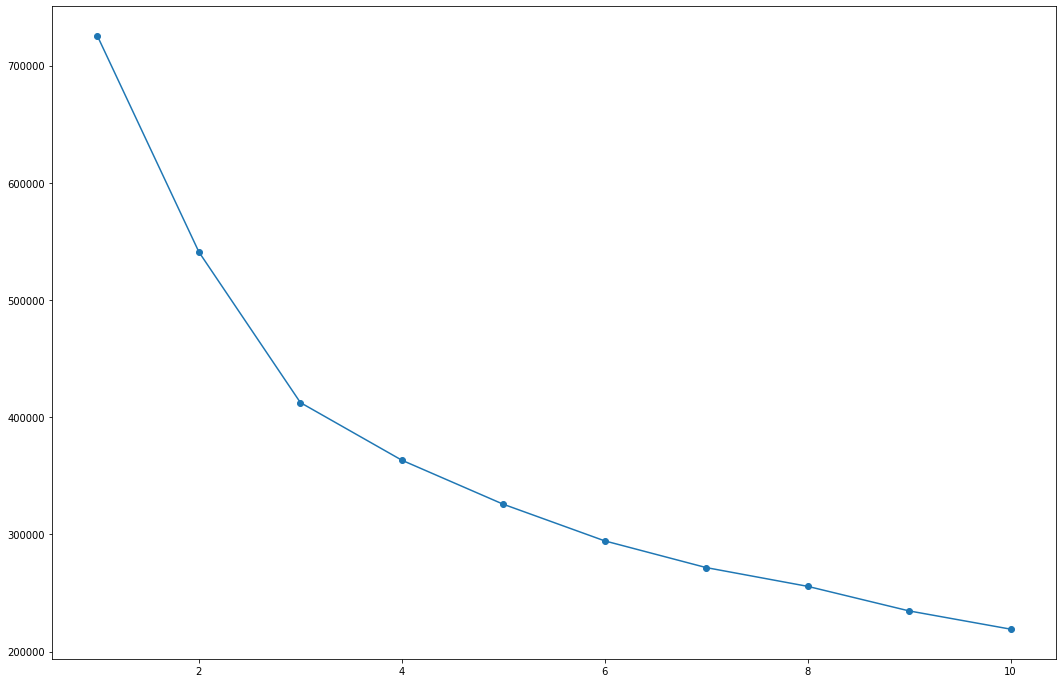

In [ ]:
# 군집을 몇 개로 해야 하는지 파악하기 위해 엘보우 기법 사용
from sklearn.cluster import KMeans

sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=100, max_iter=1000).fit(airline_personal_scaling)
    sse.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(18, 12))
ax.plot(range(1, 11), sse, marker="o") # 아주 분명하지는 않지만 3에서 꺾이는 모습

### 실루엣 스코어

In [ ]:
# 실루엣 스코어
from sklearn.metrics import silhouette_score

def no_clusters_silhouette(cluster_list, X_features):
    for n_cluster in cluster_list:
        clusters = KMeans(n_clusters=n_cluster, init="k-means++", random_state=100, max_iter=1000)
        cluster_labels = clusters.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        print("Number of Cluster: " + str(n_cluster) + " Silhouette Score: " + str(round(sil_avg, 4)))
no_clusters_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], airline_personal_scaling)
# 3개일 때 가장 크기 때문에 K값을 3으로 결정

### K-Means 군집와 그룹 별 비율 확인 및 시각화

In [ ]:
# K-Means
airline_personal_kmeans = airline_personal.copy()

kmeans = KMeans(n_clusters=3, init="k-means++", random_state=100, max_iter=1000)
kmeans.fit(airline_personal_scaling)
airline_personal_kmeans["KMeans"] = kmeans.predict(airline_personal_scaling)

kmeans_result = airline_personal_kmeans.groupby(["KMeans"]).mean().sort_values(by="satisfaction").reset_index()

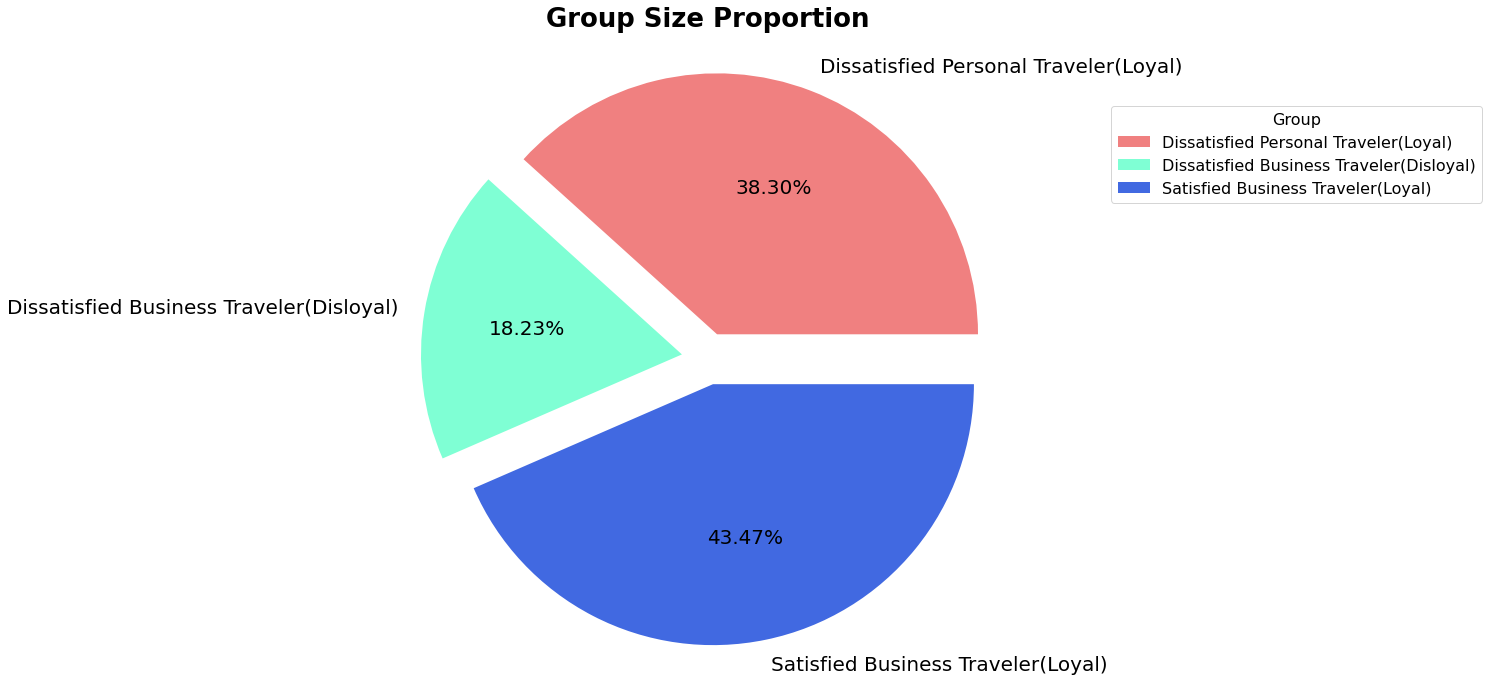

In [ ]:
# 그룹 당 비율
group_size = airline_personal_kmeans[["KMeans", "Gender"]].groupby(["KMeans"]).count().rename(columns={"Gender":"Group_Size"})
group_size["Group_Proportion"] = group_size["Group_Size"] / group_size["Group_Size"].sum()

f, ax = plt.subplots(figsize=(18, 12))
ax.pie(group_size["Group_Proportion"], 
       labels=["Dissatisfied Personal Traveler(Loyal)", "Dissatisfied Business Traveler(Disloyal)", 
               "Satisfied Business Traveler(Loyal)"], 
       autopct="%.2f%%", textprops={"size":"20", "color":"k"}, explode=(0.1, 0.1, 0.1), 
       colors=["lightcoral", "aquamarine", "royalblue"])
plt.title("Group Size Proportion", fontsize=26, fontweight="bold")
plt.legend(loc="best", prop={"size":16}, bbox_to_anchor=(1.5, -0.1, 0.2, 1.0), title="Group", title_fontsize=16)
plt.show()

## 모델 학습 전 전처리

In [ ]:
# 고객 평가지표 데이터프레임
airline_score = airline.iloc[:, 8:24]
airline_score["Group"] = airline_personal_kmeans["KMeans"]

In [ ]:
# 학습 전 데이터 전처리
airline_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Inflight wifi service              103594 non-null  int64  
 1   Departure/Arrival time convenient  103594 non-null  int64  
 2   Ease of Online booking             103594 non-null  int64  
 3   Gate location                      103594 non-null  int64  
 4   Food and drink                     103594 non-null  int64  
 5   Online boarding                    103594 non-null  int64  
 6   Seat comfort                       103594 non-null  int64  
 7   Inflight entertainment             103594 non-null  int64  
 8   On-board service                   103594 non-null  int64  
 9   Leg room service                   103594 non-null  int64  
 10  Baggage handling                   103594 non-null  int64  
 11  Checkin service                    1035

In [ ]:
airline_score.astype(int) # 컬럼 하나가 실수형이라 정수형으로 바꿔줌
airline_score["satisfaction"] = airline_personal_kmeans["satisfaction"]

In [ ]:
# X, y 정의
X = airline_score.drop(["Group", "satisfaction"], axis=1)
y = airline_score["satisfaction"]

In [ ]:
# 평가지표 함수 정의
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def evaluation(airline_test, pred):
    acc = accuracy_score(airline_test, pred)
    pre = precision_score(airline_test, pred)
    rec = recall_score(airline_test, pred)
    roc = roc_auc_score(airline_test, pred)
    cf_matrix = confusion_matrix(airline_test, pred)
    print("정확도: {0:.4f}".format(acc))
    print("정밀도: {0:.4f}".format(pre))
    print("재현율: {0:.4f}".format(rec))
    print("roc_auc_score: {0:.4f}".format(roc))
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

## 모델 학습 및 평가

정확도: 0.8136
정밀도: 0.7984
재현율: 0.7696
roc_auc_score: 0.8088


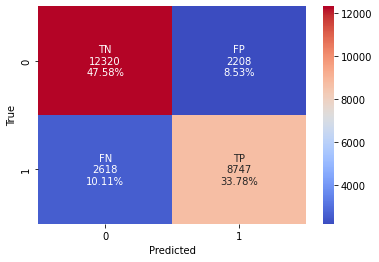

In [ ]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)
pred_lr = lr.predict(airline_test_X)
evaluation(airline_test, pred_lr)

정확도: 0.9263
정밀도: 0.9129
재현율: 0.9199
roc_auc_score: 0.9256


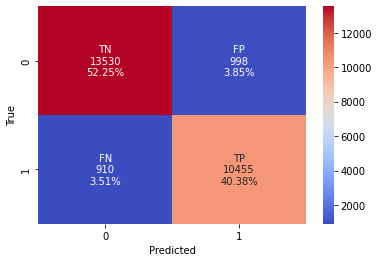

In [ ]:
#의사결정나무 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)
pred_dt = dt.predict(airline_test_X)
evaluation(airline_test, pred_dt)

정확도: 0.9471
정밀도: 0.9549
재현율: 0.9230
roc_auc_score: 0.9445


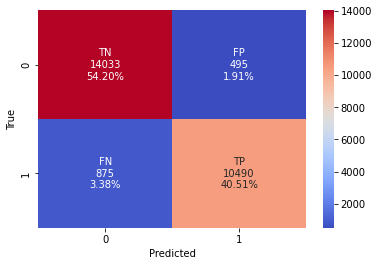

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)
pred_rf = rf.predict(airline_test_X)
evaluation(airline_test, pred_rf)

정확도: 0.9128
정밀도: 0.9159
재현율: 0.8824
roc_auc_score: 0.9095


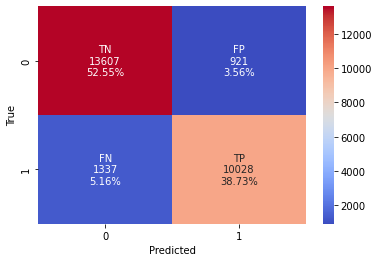

In [ ]:
# XGBoost
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(X, y)
pred_xg = xg.predict(airline_test_X)
evaluation(airline_test, pred_xg)

정확도: 0.9437
정밀도: 0.9504
재현율: 0.9196
roc_auc_score: 0.9410


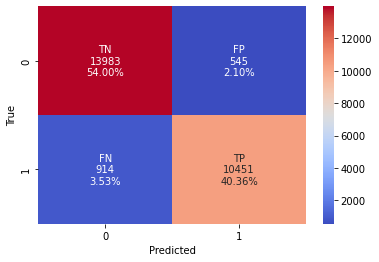

In [ ]:
# LightGBM
import lightgbm as lgb

gbm = lgb.LGBMClassifier()
gbm.fit(X, y)
pred_gbm = gbm.predict(airline_test_X)
evaluation(airline_test, pred_gbm)

정확도: 0.9162
정밀도: 0.9272
재현율: 0.8781
roc_auc_score: 0.9121


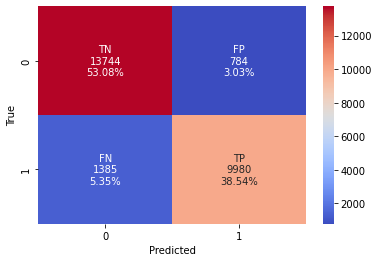

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(scaler.fit_transform(X), y)
pred_knn = knn.predict(scaler.fit_transform(airline_test_X))
evaluation(airline_test, pred_knn)

여기까지는 기본 모델이고, 향후 전처리 과정에서의 피쳐 엔지니어링, 모델 학습 과정에서의 그리드 서치나 반복문 사용 등을 통해 더 정확하고 엄밀한 모델 평가를 해야할 필요성이 있음. 또한, 점수 말고 다른 항목들이 만족도에 미치는 영향을 분석해봐도 좋을 것 같음.
(미니프로젝트 이후) 좀 더 발전시켜서, 만족도에 큰 영향을 주는 서비스 항목 등을 분석하여 향후 개선 전략 등을 수립하는 등의 포트폴리오를 만들 수 있겠음.

한 편, Colab으로 하니깐 스파이더 및 주피터로 했을 때랑 다르게 데이터 프레임이 이상하게 출력되는 문제가 있음. 자세한 사항은 확인해보아야 할듯.

## 상관계수 알아본 셀들

In [ ]:
airline_sample = airline.copy()
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
airline_sample.iloc[:, 9] = mm_scaler.fit_transform(airline_sample.iloc[:, [9]])
airline_sample.iloc[:, 22] = mm_scaler.fit_transform(airline_sample.iloc[:, [22]])
airline_sample.iloc[:, 23] = mm_scaler.fit_transform(airline_sample.iloc[:, [23]])

In [ ]:
airline_sample.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,0.8,...,5,4,3,4,4,5,5,0.015704,0.011364,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,0.4,...,1,1,5,3,1,4,1,0.000628,0.003788,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,0.4,...,5,4,3,4,4,4,5,0.000000,0.000000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,1.0,...,2,2,5,3,1,4,2,0.006910,0.005682,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,0.6,...,3,3,4,4,3,3,3,0.000000,0.000000,satisfied


In [ ]:
airline_sample.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.003146,0.004806,0.002973,-0.002523,0.000750,0.001941,0.005007,-0.001974,0.001126,0.000343,0.001474,0.001046,0.004061,-0.000328,-0.004205,-0.000011,-0.000978,-0.000694,-0.000045
id,0.003146,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254
Age,0.004806,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.002973,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,-0.002523,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,0.000750,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.001941,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,0.005007,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,-0.001974,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.001126,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949


In [ ]:
airline_personal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,0,1,0,13,1,2,460
1,0,1,1,25,0,0,235
2,1,0,0,26,0,0,1142
3,0,0,0,25,0,0,562
4,1,1,0,61,0,0,214
...,...,...,...,...,...,...,...
103899,0,0,1,23,0,1,192
103900,1,1,0,49,0,0,2347
103901,0,1,1,30,0,0,1995
103902,0,0,1,22,0,1,1000


In [ ]:
kmeans_result

,KMeans,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,0,0.112321,0.498488,0.000807,39.175993,0.801472,1.119883,765.645392
1,1,0.236736,0.458700,1.000000,30.307635,0.006936,0.649635,712.240125
2,2,0.798694,0.501354,0.000311,43.365308,0.004485,0.107292,1762.610001


In [ ]:
airline_personal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,0,1,0,13,1,2,460
1,0,1,1,25,0,0,235
2,1,0,0,26,0,0,1142
3,0,0,0,25,0,0,562
4,1,1,0,61,0,0,214
...,...,...,...,...,...,...,...
103899,0,0,1,23,0,1,192
103900,1,1,0,49,0,0,2347
103901,0,1,1,30,0,0,1995
103902,0,0,1,22,0,1,1000


In [ ]:
airline_personal["Seat"] = airline["Seat comfort"]
airline_personal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat
0,0,1,0,13,1,2,460,5
1,0,1,1,25,0,0,235,1
2,1,0,0,26,0,0,1142,5
3,0,0,0,25,0,0,562,2
4,1,1,0,61,0,0,214,5
...,...,...,...,...,...,...,...,...
103899,0,0,1,23,0,1,192,2
103900,1,1,0,49,0,0,2347,5
103901,0,1,1,30,0,0,1995,5
103902,0,0,1,22,0,1,1000,1


In [ ]:
airline_personal.corr()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat
satisfaction,1.000000,0.012356,-0.187558,0.137040,-0.448995,-0.449466,0.298915,0.349112
Gender,0.012356,1.000000,-0.031558,0.008921,0.006808,-0.012840,0.006079,-0.026643
Customer Type,-0.187558,-0.031558,1.000000,-0.281821,-0.308268,0.042589,-0.225363,-0.159722
Age,0.137040,0.008921,-0.281821,1.000000,-0.048593,-0.117423,0.099838,0.160302
Type of Travel,-0.448995,0.006808,-0.308268,-0.048593,1.000000,0.487001,-0.267642,-0.123994
Class,-0.449466,-0.012840,0.042589,-0.117423,0.487001,1.000000,-0.427509,-0.209955
Flight Distance,0.298915,0.006079,-0.225363,0.099838,-0.267642,-0.427509,1.000000,0.157517
Seat,0.349112,-0.026643,-0.159722,0.160302,-0.123994,-0.209955,0.157517,1.000000


## 피쳐 엔지니어링을 통한 모델학습

### 전처리 > 데이터프레임 나누고 점수 평균화

#### 훈련셋

In [ ]:
onboard_services = airline[["Inflight wifi service", "Food and drink", "Seat comfort", "On-board service", 
                            "Leg room service", "Cleanliness"]]
inflight_services = airline[["Departure/Arrival time convenient", "Inflight entertainment", 
                             "Inflight service"]]
airport_services = airline[["Gate location", "Online boarding", "Baggage handling", 
                            "Checkin service"]]
preriding_services = airline[["Ease of Online booking"]]
environmental_factors = airline[["Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [ ]:
onboard_services["onboard_score"] = onboard_services.mean(axis=1)
inflight_services["inflight_score"] = inflight_services.mean(axis=1)
airport_services["airport_score"] = airport_services.mean(axis=1)
preriding_services["preriding_score"] = preriding_services.mean(axis=1)
environmental_factors["late_means"] = environmental_factors.mean(axis=1)

In [ ]:
airline_package = pd.DataFrame(onboard_services.iloc[:, -1])

In [ ]:
airline_package["inflight_score"] = inflight_services.iloc[:, -1]
airline_package["airport_score"] = airport_services.iloc[:, -1]
airline_package["preriding_score"] = preriding_services.iloc[:, -1]
airline_package["late_means"] = environmental_factors.iloc[:, -1]
airline_package["satisfaction"] = airline_personal["satisfaction"]

In [ ]:
airline_package # 훈련셋

,onboard_score,inflight_score,airport_score,preriding_score,late_means,satisfaction
0,4.166667,4.666667,3.00,3.0,21.5,0
1,2.000000,2.333333,2.50,3.0,3.5,0
2,4.000000,3.666667,3.75,2.0,0.0,1
3,2.500000,3.666667,2.75,5.0,10.0,0
4,3.666667,3.000000,3.75,3.0,0.0,1
...,...,...,...,...,...,...
103899,2.000000,2.000000,2.75,2.0,1.5,0
103900,4.166667,4.666667,4.50,4.0,0.0,1
103901,3.166667,3.333333,3.25,1.0,10.5,0
103902,2.166667,2.000000,3.00,1.0,0.0,0


#### 시험셋

In [ ]:
onboard_services_test = airline_test_X[["Inflight wifi service", "Food and drink", "Seat comfort", "On-board service", 
                            "Leg room service", "Cleanliness"]]
inflight_services_test = airline_test_X[["Departure/Arrival time convenient", "Inflight entertainment", 
                             "Inflight service"]]
airport_services_test = airline_test_X[["Gate location", "Online boarding", "Baggage handling", 
                            "Checkin service"]]
preriding_services_test = airline_test_X[["Ease of Online booking"]]
environmental_factors_test = airline_test_X[["Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [ ]:
onboard_services_test["onboard_score"] = onboard_services_test.mean(axis=1)
inflight_services_test["inflight_score"] = inflight_services_test.mean(axis=1)
airport_services_test["airport_score"] = airport_services_test.mean(axis=1)
preriding_services_test["preriding_score"] = preriding_services_test.mean(axis=1)
environmental_factors_test["late_means"] = environmental_factors_test.mean(axis=1)

In [ ]:
airline_package_test = pd.DataFrame(onboard_services_test.iloc[:, -1])

In [ ]:
airline_package_test["inflight_score"] = inflight_services_test.iloc[:, -1]
airline_package_test["airport_score"] = airport_services_test.iloc[:, -1]
airline_package_test["preriding_score"] = preriding_services_test.iloc[:, -1]
airline_package_test["late_means"] = environmental_factors_test.iloc[:, -1]
airline_package_test["satisfaction"] = airline_test

In [ ]:
airline_package_test

,onboard_score,inflight_score,airport_score,preriding_score,late_means,satisfaction
0,4.333333,4.666667,3.75,3.0,47.0,1
1,4.000000,3.000000,3.00,3.0,0.0,1
2,2.166667,1.333333,2.75,2.0,0.0,0
3,2.166667,0.666667,2.50,0.0,3.0,1
4,2.666667,2.333333,2.50,4.0,10.0,1
...,...,...,...,...,...,...
25971,3.333333,4.000000,3.00,3.0,0.0,0
25972,4.166667,4.333333,4.50,4.0,0.0,1
25973,2.500000,3.666667,3.75,1.0,0.0,0
25974,3.333333,4.000000,4.00,3.0,0.0,1


### 모델학습

In [ ]:
# 훈련셋 시험셋 설정
X_pack = airline_package.drop(["satisfaction"], axis=1)
X_pack_test = airline_package_test.drop(["satisfaction"], axis=1)
y_pack = airline_package["satisfaction"]
y_pack_test = airline_package_test["satisfaction"]

정확도: 0.7688
정밀도: 0.7475
재현율: 0.7147
roc_auc_score: 0.7629


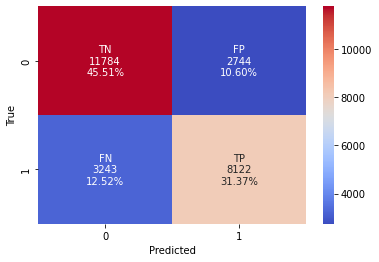

In [ ]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_pack, y_pack)
pred_lr2 = lr2.predict(X_pack_test)
evaluation(y_pack_test, pred_lr2)

정확도: 0.7736
정밀도: 0.7512
재현율: 0.7241
roc_auc_score: 0.7682


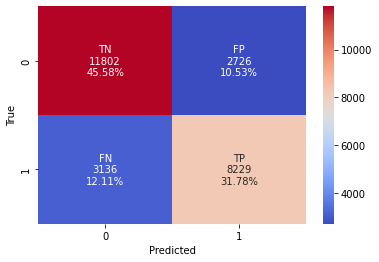

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_pack, y_pack)
pred_dt2 = dt2.predict(X_pack_test)
evaluation(y_pack_test, pred_dt2)

정확도: 0.7959
정밀도: 0.7752
재현율: 0.7534
roc_auc_score: 0.7912


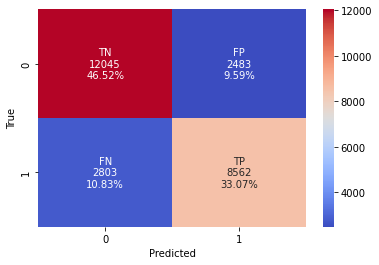

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(X_pack, y_pack)
pred_rf2 = rf2.predict(X_pack_test)
evaluation(y_pack_test, pred_rf2)

정확도: 0.8149
정밀도: 0.8036
재현율: 0.7652
roc_auc_score: 0.8095


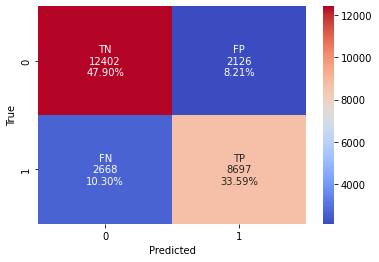

In [ ]:
xg2 = xgb.XGBClassifier()
xg2.fit(X_pack, y_pack)
pred_xg2 = xg2.predict(X_pack_test)
evaluation(y_pack_test, pred_xg2)

정확도: 0.8231
정밀도: 0.8117
재현율: 0.7773
roc_auc_score: 0.8181


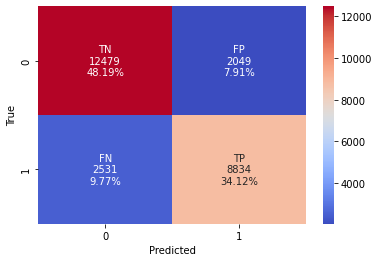

In [ ]:
gbm2 = lgb.LGBMClassifier()
gbm2.fit(X_pack, y_pack)
pred_gbm2 = gbm2.predict(X_pack_test)
evaluation(y_pack_test, pred_gbm2)

정확도: 0.8043
정밀도: 0.7850
재현율: 0.7631
roc_auc_score: 0.7998


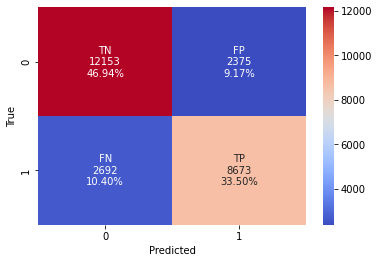

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(scaler.fit_transform(X_pack), y_pack)
pred_knn2 = knn2.predict(scaler.fit_transform(X_pack_test))
evaluation(y_pack_test, pred_knn2)

## 개인정보로만 모델학습

### 전처리(훈련셋은 이미 되어 있어서 시험셋만)

In [ ]:
airline_personal_test = airline2[["satisfaction", "Gender", "Customer Type", 
                          "Age", "Type of Travel", "Class", "Flight Distance"]]

In [ ]:
# 레이블 인코딩
temp_list = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
encoder2 = LabelEncoder()
for i in temp_list:
    encoder2.fit(airline_personal_test[i])
    airline_personal_test[i] = encoder2.transform(airline_personal_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
airline_personal_test

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,1,0,0,52,0,1,160
1,1,0,0,36,0,0,2863
2,0,1,1,20,0,1,192
3,1,1,0,44,0,0,3377
4,1,0,0,49,0,1,1182
...,...,...,...,...,...,...,...
25971,0,1,1,34,0,0,526
25972,1,1,0,23,0,0,646
25973,0,0,0,17,1,1,828
25974,1,1,0,14,0,0,1127


In [ ]:
airline_personal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat
0,0,1,0,13,1,2,460,5
1,0,1,1,25,0,0,235,1
2,1,0,0,26,0,0,1142,5
3,0,0,0,25,0,0,562,2
4,1,1,0,61,0,0,214,5
...,...,...,...,...,...,...,...,...
103899,0,0,1,23,0,1,192,2
103900,1,1,0,49,0,0,2347,5
103901,0,1,1,30,0,0,1995,5
103902,0,0,1,22,0,1,1000,1


### 모델학습

In [ ]:
# 데이터셋 정의
X_personal = airline_personal.drop(["satisfaction", "Seat"], axis=1)
X_personal_test = airline_personal_test.drop(["satisfaction"], axis=1)
y_personal = airline_personal["satisfaction"]
y_personal_test = airline_personal_test["satisfaction"]

정확도: 0.7762
정밀도: 0.7242
재현율: 0.7916
roc_auc_score: 0.7779


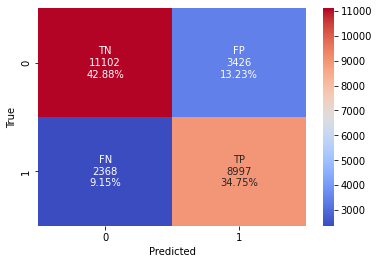

In [ ]:
lr3 = LogisticRegression(max_iter=1000)
lr3.fit(X_personal, y_personal)
pred_lr3 = lr3.predict(X_personal_test)
evaluation(y_personal_test, pred_lr3)

정확도: 0.7138
정밀도: 0.6813
재현율: 0.6538
roc_auc_score: 0.7073


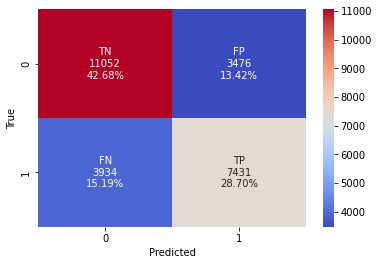

In [ ]:
dt3 = DecisionTreeClassifier()
dt3.fit(X_personal, y_personal)
pred_dt3 = dt3.predict(X_personal_test)
evaluation(y_personal_test, pred_dt3)

정확도: 0.7353
정밀도: 0.7055
재현율: 0.6815
roc_auc_score: 0.7295


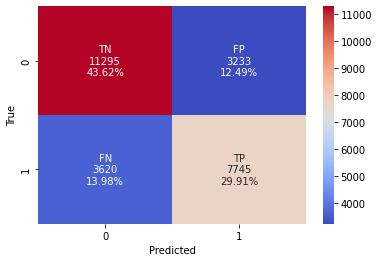

In [ ]:
rf3 = RandomForestClassifier()
rf3.fit(X_personal, y_personal)
pred_rf3 = rf3.predict(X_personal_test)
evaluation(y_personal_test, pred_rf3)

정확도: 0.7939
정밀도: 0.7846
재현율: 0.7311
roc_auc_score: 0.7870


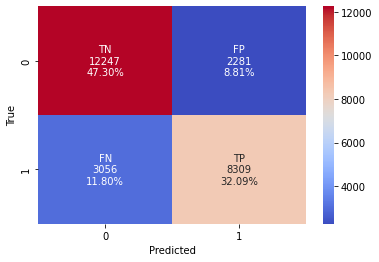

In [ ]:
xg3 = xgb.XGBClassifier()
xg3.fit(X_personal, y_personal)
pred_xg3 = xg3.predict(X_personal_test)
evaluation(y_personal_test, pred_xg3)

정확도: 0.7942
정밀도: 0.7734
재현율: 0.7512
roc_auc_score: 0.7895


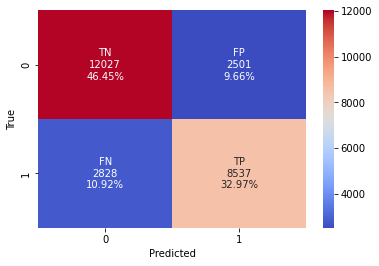

In [ ]:
gbm3 = lgb.LGBMClassifier()
gbm3.fit(X_personal, y_personal)
pred_gbm3 = gbm3.predict(X_personal_test)
evaluation(y_personal_test, pred_gbm3)

정확도: 0.7690
정밀도: 0.7365
재현율: 0.7374
roc_auc_score: 0.7655


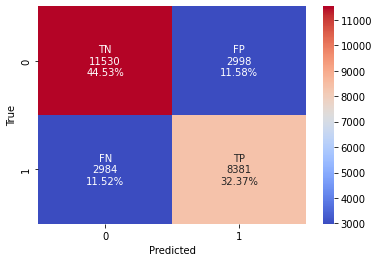

In [ ]:
knn3 = KNeighborsClassifier()
knn3.fit(scaler.fit_transform(X_personal), y_personal)
pred_knn3 = knn3.predict(scaler.fit_transform(X_personal_test))
evaluation(y_personal_test, pred_knn3)